In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train = pd.DataFrame(train)
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
mean=test['Age'].mean()
test['Age'] = test['Age'].fillna(mean)

In [4]:
mapping ={'male':1,'female':0} #flip the Sex column into numirical values (1 = male, 0 = female)
test['SexI'] = test['Sex'].map(mapping)

mapp={'S':1,'C':2,'Q':2}# C - Cherbourg, France ,,,Q - Queenstown (now known as Cobh), Ireland ,,,, S - Southampton, England
test['EmbarkedI'] = test['Embarked'].map(mapp)

In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
print('percentage of missing values in Cabin is:',train['Cabin'].isna().mean()*100)
print('percentage of missing values in Age is:',train['Age'].isna().mean()*100)

percentage of missing values in Cabin is: 77.10437710437711
percentage of missing values in Age is: 19.865319865319865


In [8]:
Sdata = train['Sex']
mapping ={'male':1,'female':0} #flip the Sex column into numirical values (1 = male, 0 = female)
train['SexI'] = train['Sex'].map(mapping)

**missing values in age take them to mean of age specially the percentage of missing values is not too big (20%)**

In [9]:
mean=train['Age'].mean()
train['Age'] = train['Age'].fillna(mean)

In [10]:
rep=train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(rep)

In [11]:
print(train['Embarked'].isnull().sum())  # Check missing values before filling
train['Embarked'] = train['Embarked'].fillna(rep)
print(train['Embarked'].isnull().sum())  # Check missing values after filling
print(train.isna().sum())

0
0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
SexI             0
dtype: int64


In [12]:
mean=train['Age'].mean()
train['Age'] = train['Age'].fillna(mean)

In [13]:
rep=train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(rep)

In [14]:
print(train['Embarked'].isnull().sum())  # Check missing values before filling
train['Embarked'] = train['Embarked'].fillna(rep)
print(train['Embarked'].isnull().sum())  # Check missing values after filling
print(train.isna().sum())

0
0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
SexI             0
dtype: int64


In [15]:
print(train['Embarked'].value_counts())
mapp={'S':1,'C':2,'Q':2}# C - Cherbourg, France ,,,Q - Queenstown (now known as Cobh), Ireland ,,,, S - Southampton, England
train['EmbarkedI'] = train['Embarked'].map(mapp)

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [16]:
train = train.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)
test =  test.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

**SO FOR NOW WE HAVE DONE MMANIPULATE THE COLUMNS AND REPLACE TEXT VALUES WITH NUMERICAL VALUE AND ADD THE NULL VALUS ...**

****let's now Exploratory Data Analysis****

In [17]:
train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexI,EmbarkedI
0,1,0,3,22.0,1,0,7.2500,1,1
1,2,1,1,38.0,1,0,71.2833,0,2
2,3,1,3,26.0,0,0,7.9250,0,1
3,4,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,35.0,0,0,8.0500,1,1


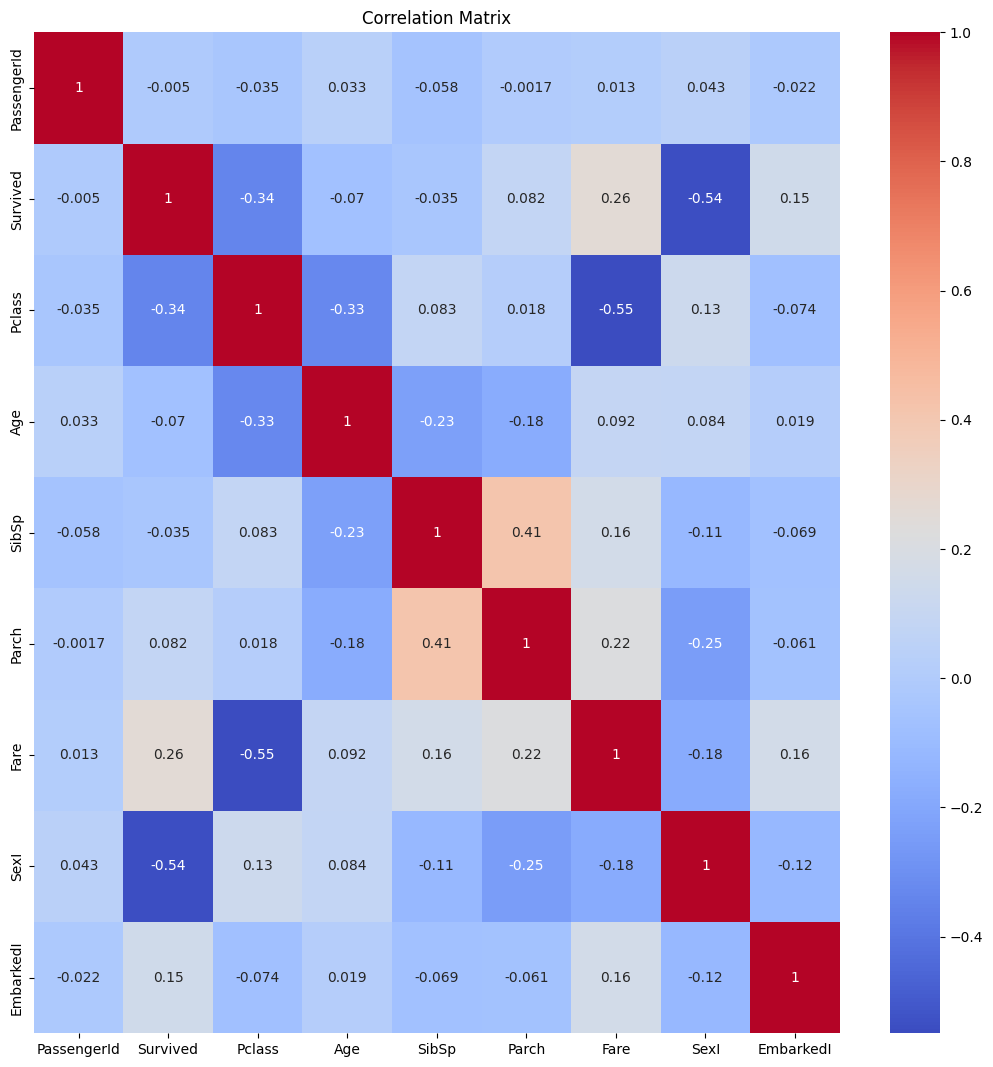

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

correlationMatrix = train.corr()

plt.figure(figsize=(13,13))
sns.heatmap(correlationMatrix,annot=True ,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

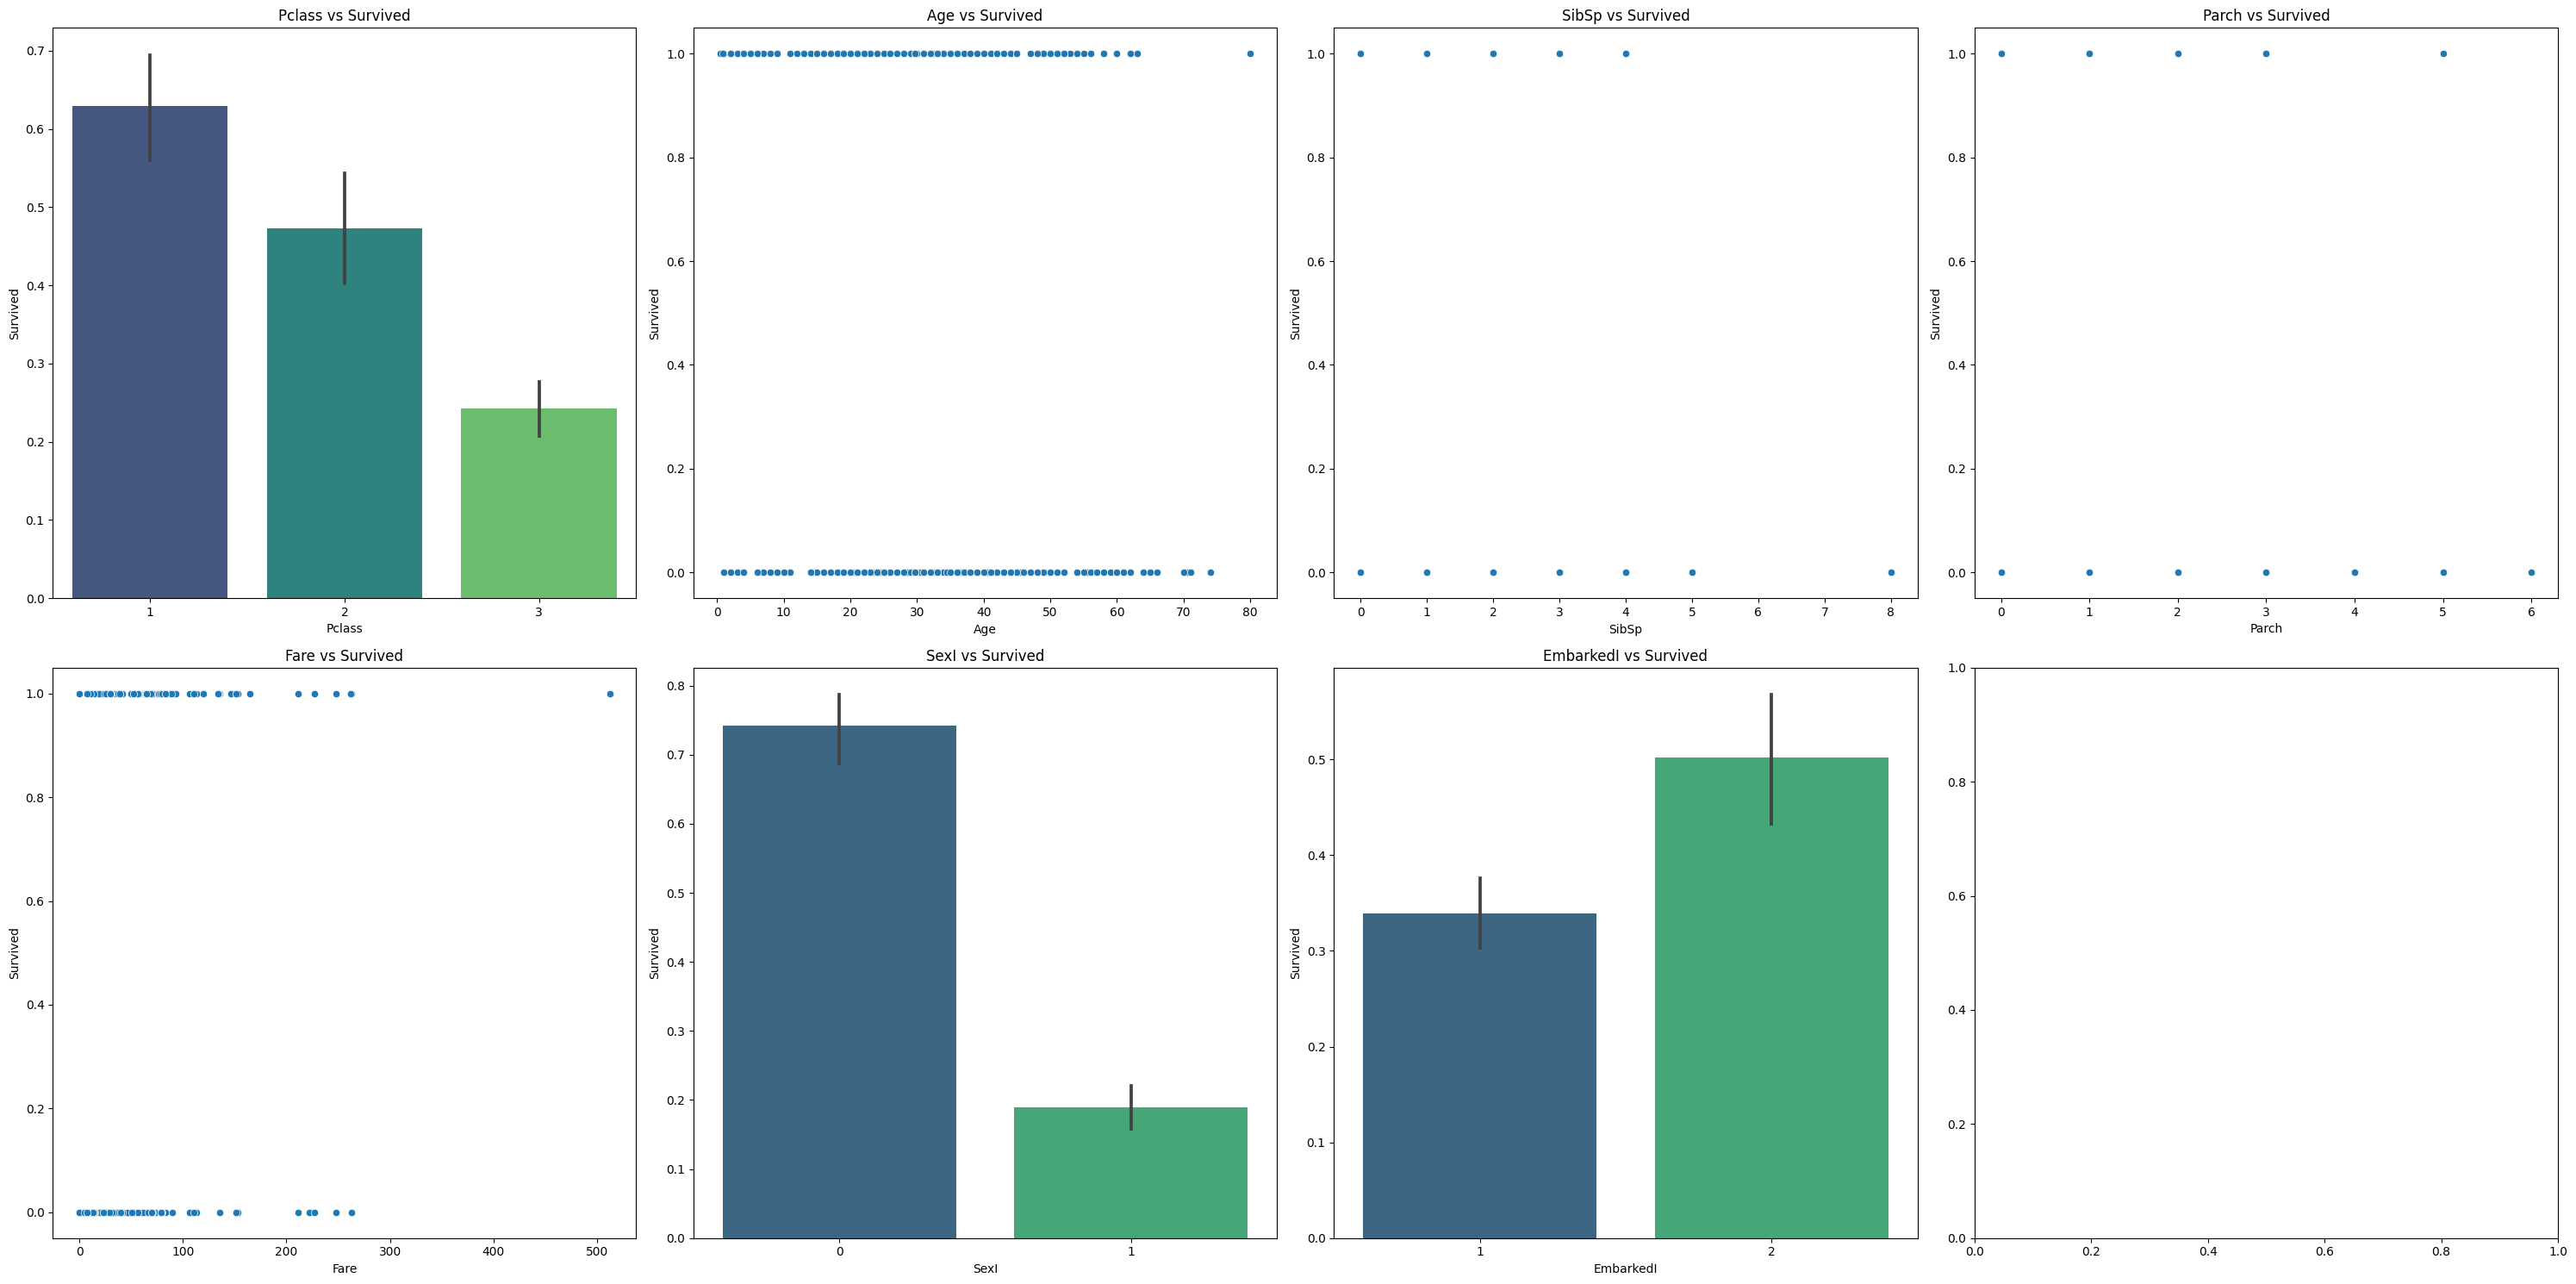

In [19]:
vss = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'SexI', 'EmbarkedI']
fig, axs = plt.subplots(2, 4, figsize=(30, 15))

for i, column in enumerate(vss):
    row = i // 4
    col = i % 4
    
    if column in ['Pclass', 'SexI', 'EmbarkedI']:
        # For categorical columns
        sns.barplot(x=train[column], y=train['Survived'], ax=axs[row, col], palette='viridis')
    else:
        # For numerical columns
        sns.scatterplot(x=train[column], y=train['Survived'], ax=axs[row, col])
    
    axs[row, col].set_title(column + " vs Survived")
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel("Survived")

plt.tight_layout()
plt.show()

In [20]:
rep=test['Fare'].mode()[0]
test['Fare'] = test['Fare'].fillna(rep)

In [21]:
test.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
SexI           0
EmbarkedI      0
dtype: int64

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [23]:
X = train.drop(['Survived'], axis=1)  # Features for training
y = train['Survived']  # Target for training
X_test = test

In [24]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X, y, test_size=0.2, random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)

LogisticRegression(max_iter=1000)

In [25]:
pred=model.predict(X_test)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [26]:
if len(test) == len(pred):
    submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred})
    submission.to_csv('submission.csv', index=False)
else:
    print(f"Length mismatch: test data length = {len(test)}, predictions length = {len(pred)}")

In [27]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [28]:
y_val_pred = model.predict(X_val_split)
y_val_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [29]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

accuracy = accuracy_score(y_val_split, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

print(classification_report(y_val_split, y_val_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_val_split, model.predict_proba(X_val_split)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')

Validation Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

ROC-AUC Score: 0.88
